In [3]:
import pandas as pd

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
!conda install -c conda-forge lxml --yes

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [4]:
link='https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin'

In [5]:
tables=pd.read_html(link,header=0)

In [79]:
b_df = tables[0]

In [80]:
# Borough dataframe
b_df

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN
2,Lichtenberg,259881,52.29,4952,NaN
3,Marzahn-Hellersdorf,248264,61.74,4046,NaN
4,Mitte,332919,39.47,8272,NaN
5,Neukölln,310283,44.93,6804,NaN
6,Pankow,366441,103.01,3476,NaN
7,Reinickendorf,240454,89.46,2712,NaN
8,Spandau,223962,91.91,2441,NaN
9,Steglitz-Zehlendorf,293989,102.50,2818,NaN


The other tables dataframes will help us to have the neighborhoods in each borough. See example below:

In [81]:
tables[2]

,Locality,Area in km2,Population as of 2008,Density inhabitants per km2,Map
0,(0101) Mitte,10.70,79582,7445,NaN
1,(0102) Moabit,7.72,69425,8993,NaN
2,(0103) Hansaviertel,0.53,5889,11111,NaN
3,(0104) Tiergarten,5.17,12486,2415,NaN
4,(0105) Wedding,9.23,76363,8273,NaN
5,(0106) Gesundbrunnen,6.13,82729,13496,NaN


We now build a sample dataframe of the boroughs in the order on the wikipedia page

In [90]:
borough_df = pd.DataFrame({
        "No": ["0","1","2","3","4","5","6","7","8","9","10","11"],
        "Borough": ["Mitte",
        "Friedrichshain-Kreuzberg",
        "Pankow",
        "Charlottenburg-Wilmersdorf",
        "Spandau",
        "Steglitz-Zehlendorf",
        "Tempelhof-Schöneberg",
        "Neukölln",
        "Treptow-Köpenick",
        "Marzahn-Hellersdorf",
        "Lichtenberg",
        "Reinickendorf"]
    },
        index=[0,1,2,3,4,5,6,7,8,9,10,11])
borough_df

,No,Borough
0,0,Mitte
1,1,Friedrichshain-Kreuzberg
2,2,Pankow
3,3,Charlottenburg-Wilmersdorf
4,4,Spandau
5,5,Steglitz-Zehlendorf
6,6,Tempelhof-Schöneberg
7,7,Neukölln
8,8,Treptow-Köpenick
9,9,Marzahn-Hellersdorf


Merge borough number data with the initial borough dataframe

In [91]:
b_df = b_df.merge(borough_df, on="Borough")

In [92]:
b_df.sort_values(by=['No'], ascending=True)

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map,No_x,Neighborhoods,No_y,No
4,Mitte,332919,39.47,8272,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,0
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,1
2,Lichtenberg,259881,52.29,4952,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,10
6,Pankow,366441,103.01,3476,NaN,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",2,2
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,3
7,Spandau,223962,91.91,2441,NaN,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",4,4
8,Steglitz-Zehlendorf,293989,102.50,2818,NaN,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",5,5
9,Tempelhof-Schöneberg,335060,53.09,6256,NaN,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",6,6
5,Neukölln,310283,44.93,6804,NaN,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",7,7
10,Treptow-Köpenick,241335,168.42,1406,NaN,8,"[(0901) Alt-Treptow,(0902) Plänterwald,(0903) ...",8,8


In [93]:
b_df.sort_values(by=['No'], ascending=True)

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map,No_x,Neighborhoods,No_y,No
4,Mitte,332919,39.47,8272,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,0
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,1
2,Lichtenberg,259881,52.29,4952,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,10
6,Pankow,366441,103.01,3476,NaN,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",2,2
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,3
7,Spandau,223962,91.91,2441,NaN,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",4,4
8,Steglitz-Zehlendorf,293989,102.50,2818,NaN,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",5,5
9,Tempelhof-Schöneberg,335060,53.09,6256,NaN,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",6,6
5,Neukölln,310283,44.93,6804,NaN,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",7,7
10,Treptow-Köpenick,241335,168.42,1406,NaN,8,"[(0901) Alt-Treptow,(0902) Plänterwald,(0903) ...",8,8


We sort the dataframe to be sure that we have the order of Boroughs as on the wikipedia page

In [94]:
no = []
neigborhoods_arr = []
j=0
for i in range(2, len(tables) - 4):
    nieghborhoods = ','.join(tables[i]['Locality'].values)
    neigborhoods_arr.append([nieghborhoods])
    no.append(str(j))
    j+=1

In [95]:
neigh_df = pd.DataFrame({
    "No": no,
    "Neighborhoods": neigborhoods_arr
}, index=no)

In [96]:
neigh_df

,No,Neighborhoods
0,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte..."
1,1,"[(0201) Friedrichshain,(0202) Kreuzberg]"
2,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303..."
3,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040..."
4,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme..."
5,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La..."
6,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem..."
7,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0..."
8,8,"[(0901) Alt-Treptow,(0902) Plänterwald,(0903) ..."
9,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo..."


In [101]:
b_df=b_df.merge(neigh_df, on="No")

In [102]:
b_df

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","[(0401) Charlottenburg,(0402) Wilmersdorf,(040..."
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,1,"[(0201) Friedrichshain,(0202) Kreuzberg]","[(0201) Friedrichshain,(0202) Kreuzberg]"
2,Lichtenberg,259881,52.29,4952,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","[(1101) Friedrichsfelde,(1102) Karlshorst,(110..."
3,Marzahn-Hellersdorf,248264,61.74,4046,NaN,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",9,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo..."
4,Mitte,332919,39.47,8272,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","[(0101) Mitte,(0102) Moabit,(0103) Hansavierte..."
5,Neukölln,310283,44.93,6804,NaN,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",7,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0..."
6,Pankow,366441,103.01,3476,NaN,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",2,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","[(0301) Prenzlauer Berg,(0302) Weißensee,(0303..."
7,Spandau,223962,91.91,2441,NaN,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",4,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","[(0501) Spandau,(0502) Haselhorst,(0503) Sieme..."
8,Steglitz-Zehlendorf,293989,102.50,2818,NaN,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",5,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","[(0601) Steglitz,(0602) Lichterfelde,(0603) La..."
9,Tempelhof-Schöneberg,335060,53.09,6256,NaN,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",6,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","[(0701) Schöneberg,(0702) Friedenau,(0703) Tem..."


Examine to see if we have a sample neighbood that matches the Borough

In [103]:
b_df.iloc[4]['Neighborhoods']

['(0101) Mitte,(0102) Moabit,(0103) Hansaviertel,(0104) Tiergarten,(0105) Wedding,(0106) Gesundbrunnen']

### We look for the price per square meter now for each boroough

In [104]:
### Note link seems forbidden for acceess by request so we build DF manually
price_link='https://www.invest-ab.com/sell-property-flat-berlin/berlin-real-estate-prices-2020/'

In [105]:
price_df = pd.DataFrame({
    "Borough": ["Charlottenburg-Wilmersdorf", "Mitte", "Friedrichshain-Kreuzberg","Tempelhof-Schöneberg", "Pankow","Steglitz-Zehlendorf"
               ,"Treptow-Köpenick", "Reinickendorf", "Neukölln", "Spandau", "Marzahn-Hellersdorf", "Lichtenberg"],
    "Prefered residential area": ["13,25", "13,25", "12,00", "11,75", "11,50", "11,25", "10,50", "10,25", "10,25", "9,75", "9,50","9,25"],
    "Standard residential area": ["11,00", "10,50", "10,00", "9,75", "10,00", "9,50", "9,50", "9,25", "8,50","8,50","8,50", "9,25"]
}, index=[0,1,2,3,4,5,6,7,8,9,10,11])

In [106]:
price_df

,Borough,Prefered residential area,Standard residential area
0,Charlottenburg-Wilmersdorf,"13,25","11,00"
1,Mitte,"13,25","10,50"
2,Friedrichshain-Kreuzberg,"12,00","10,00"
3,Tempelhof-Schöneberg,"11,75","9,75"
4,Pankow,"11,50","10,00"
5,Steglitz-Zehlendorf,"11,25","9,50"
6,Treptow-Köpenick,"10,50","9,50"
7,Reinickendorf,"10,25","9,25"
8,Neukölln,"10,25","8,50"
9,Spandau,"9,75","8,50"


### Merge price dataframe with prices dataframe based on Borugh

In [107]:
b_df = b_df.merge(price_df, on="Borough")

In [108]:
b_df

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","13,25","11,00"
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,1,"[(0201) Friedrichshain,(0202) Kreuzberg]","[(0201) Friedrichshain,(0202) Kreuzberg]","12,00","10,00"
2,Lichtenberg,259881,52.29,4952,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","9,25","9,25"
3,Marzahn-Hellersdorf,248264,61.74,4046,NaN,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",9,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","9,50","8,50"
4,Mitte,332919,39.47,8272,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","13,25","10,50"
5,Neukölln,310283,44.93,6804,NaN,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",7,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","10,25","8,50"
6,Pankow,366441,103.01,3476,NaN,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",2,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","11,50","10,00"
7,Spandau,223962,91.91,2441,NaN,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",4,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","9,75","8,50"
8,Steglitz-Zehlendorf,293989,102.50,2818,NaN,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",5,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","11,25","9,50"
9,Tempelhof-Schöneberg,335060,53.09,6256,NaN,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",6,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","11,75","9,75"


We get smaple GeoJSon data of the with the Boroughs and coordinates from https://maps.princeton.edu/download/file/tufts-berlin-bezirke-boroughs01-geojson.json

In [109]:
import json
latitudes = []
longitudes = []
boroughs = []

with open('geo_data.json') as json_file:
    data  = json.load(json_file)
    for geo_data in data['features']:
        borough_name = geo_data['properties']['BezName']
        long = geo_data['geometry']['coordinates'][0][0][0][0]
        lat = geo_data['geometry']['coordinates'][0][0][0][1]
        
        boroughs.append(borough_name)
        latitudes.append(lat)
        longitudes.append(long)

### Build dataframe of coordinates

In [110]:
coord_df = pd.DataFrame({
    "Borough": boroughs,
    "Latitude": latitudes,
    "longitude": longitudes
}, index=[0,1,2,3,4,5,6,7,8,9,10,11])

In [111]:
coord_df

,Borough,Latitude,longitude
0,Mitte,52.508571,13.429401
1,Friedrichshain-Kreuzberg,52.488265,13.491453
2,Pankow,52.645034,13.523023
3,Charlottenburg-Wilmersdorf,52.504867,13.341420
4,Spandau,52.534050,13.282182
5,Steglitz-Zehlendorf,52.429116,13.371595
6,Tempelhof-Schöneberg,52.385780,13.427455
7,Neukölln,52.413591,13.524062
8,Treptow-Köpenick,52.437703,13.761140
9,Marzahn-Hellersdorf,52.525944,13.658502


### We now merge the dataframes to now have the location data

In [112]:
b_df = b_df.merge(coord_df, on="Borough")

In [113]:
b_df

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,longitude
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","13,25","11,00",52.504867,13.341420
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,1,"[(0201) Friedrichshain,(0202) Kreuzberg]","[(0201) Friedrichshain,(0202) Kreuzberg]","12,00","10,00",52.488265,13.491453
2,Lichtenberg,259881,52.29,4952,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","9,25","9,25",52.574508,13.567705
3,Marzahn-Hellersdorf,248264,61.74,4046,NaN,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",9,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","9,50","8,50",52.525944,13.658502
4,Mitte,332919,39.47,8272,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","13,25","10,50",52.508571,13.429401
5,Neukölln,310283,44.93,6804,NaN,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",7,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","10,25","8,50",52.413591,13.524062
6,Pankow,366441,103.01,3476,NaN,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",2,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","11,50","10,00",52.645034,13.523023
7,Spandau,223962,91.91,2441,NaN,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",4,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","9,75","8,50",52.534050,13.282182
8,Steglitz-Zehlendorf,293989,102.50,2818,NaN,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",5,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","11,25","9,50",52.429116,13.371595
9,Tempelhof-Schöneberg,335060,53.09,6256,NaN,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",6,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","11,75","9,75",52.385780,13.427455


Now that we have everything in place we can remove the No which helped us to get the order of the Boroughs from the Wikipedia page

In [114]:
b_df.drop(columns=['No'])

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map,No_x,Neighborhoods_x,No_y,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,longitude
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","13,25","11,00",52.504867,13.341420
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,"[(0201) Friedrichshain,(0202) Kreuzberg]","[(0201) Friedrichshain,(0202) Kreuzberg]","12,00","10,00",52.488265,13.491453
2,Lichtenberg,259881,52.29,4952,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","9,25","9,25",52.574508,13.567705
3,Marzahn-Hellersdorf,248264,61.74,4046,NaN,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","9,50","8,50",52.525944,13.658502
4,Mitte,332919,39.47,8272,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","13,25","10,50",52.508571,13.429401
5,Neukölln,310283,44.93,6804,NaN,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","10,25","8,50",52.413591,13.524062
6,Pankow,366441,103.01,3476,NaN,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","11,50","10,00",52.645034,13.523023
7,Spandau,223962,91.91,2441,NaN,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","9,75","8,50",52.534050,13.282182
8,Steglitz-Zehlendorf,293989,102.50,2818,NaN,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","11,25","9,50",52.429116,13.371595
9,Tempelhof-Schöneberg,335060,53.09,6256,NaN,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","11,75","9,75",52.385780,13.427455


In [115]:
neighborhoods = b_df['Neighborhoods']

In [116]:
neighborhoods

0     [(0401) Charlottenburg,(0402) Wilmersdorf,(040...
1              [(0201) Friedrichshain,(0202) Kreuzberg]
2     [(1101) Friedrichsfelde,(1102) Karlshorst,(110...
3     [(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...
4     [(0101) Mitte,(0102) Moabit,(0103) Hansavierte...
5     [(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...
6     [(0301) Prenzlauer Berg,(0302) Weißensee,(0303...
7     [(0501) Spandau,(0502) Haselhorst,(0503) Sieme...
8     [(0601) Steglitz,(0602) Lichterfelde,(0603) La...
9     [(0701) Schöneberg,(0702) Friedenau,(0703) Tem...
10    [(0901) Alt-Treptow,(0902) Plänterwald,(0903) ...
Name: Neighborhoods, dtype: object

In [117]:
n_sum = 0
for n in neighborhoods:
    n_sum += len(n[0].split(','))
print('There are {} neighborhoods in our Berlin dataset!!'.format(n_sum))

There are 85 neighborhoods in our Berlin dataset!!


In [33]:
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#### Use geopy library to get the latitude and longitude values of Berlin.

In [118]:
address = 'Berlin'

geolocator = Nominatim(user_agent="be_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


In [119]:
# Rename column with typo
b_df.rename(columns = {'longitude':'Longitude'}, inplace = True) 

In [36]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(b_df['Latitude'], b_df['Longitude'], b_df['Borough'], b_df['Neighborhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### We now utilize the Foursquare API to explore the 

In [37]:
CLIENT_ID = 'TVBLFLFO5WFM1OVMGSUSI0AB1ZRT0GT5C1CSWYP354FGKDJJ' # your Foursquare ID
CLIENT_SECRET = 'WPCJ4LYX1FCEDOYIC4K4BLQUQM10L0OY2B5LESMAITPH455F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TVBLFLFO5WFM1OVMGSUSI0AB1ZRT0GT5C1CSWYP354FGKDJJ
CLIENT_SECRET:WPCJ4LYX1FCEDOYIC4K4BLQUQM10L0OY2B5LESMAITPH455F


We will now for each borough analyze the neighbohoods and viewing them on a map

In [38]:
# type your answer here

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(

    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=TVBLFLFO5WFM1OVMGSUSI0AB1ZRT0GT5C1CSWYP354FGKDJJ&client_secret=WPCJ4LYX1FCEDOYIC4K4BLQUQM10L0OY2B5LESMAITPH455F&v=20180605&ll=52.5170365,13.3888599&radius=500&limit=100&section=food'

In [39]:
import requests
results = requests.get(url).json()

In [40]:
results

{'meta': {'code': 200, 'requestId': '6034b61a94ac1d4749b5de68'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Unter den Linden',
  'headerFullLocation': 'Unter den Linden, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'query': 'food',
  'totalResults': 57,
  'suggestedBounds': {'ne': {'lat': 52.521536504500006,
    'lng': 13.39624102445079},
   'sw': {'lat': 52.5125364955, 'lng': 13.38147877554921}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adf61aef964a520177a21e3',
       'name': 'Cookies Cream',
       'location': {'address': 'Behrenstr. 55',
        'lat': 52.51656861215425,
        'lng': 13.388007784206705,
        'labeledLatLngs': [{'label': 'display',

In [41]:
items = results['response']['groups'][0]['items']

We now get the items in the response

In [42]:
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4adf61aef964a520177a21e3',
  'name': 'Cookies Cream',
  'location': {'address': 'Behrenstr. 55',
   'lat': 52.51656861215425,
   'lng': 13.388007784206705,
   'labeledLatLngs': [{'label': 'display',
     'lat': 52.51656861215425,
     'lng': 13.388007784206705}],
   'distance': 77,
   'postalCode': '10117',
   'cc': 'DE',
   'city': 'Berlin',
   'state': 'Berlin',
   'country': 'Deutschland',
   'formattedAddress': ['Behrenstr. 55', '10117 Berlin', 'Deutschland']},
  'categories': [{'id': '4bf58dd8d48988d1d3941735',
    'name': 'Vegetarian / Vegan Restaurant',
    'pluralName': 'Vegetarian / Vegan Restaurants',
    'shortName': 'Vegetarian / Vegan',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referral

In [43]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

dataframe = json_normalize(items) # flatten JSON

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [44]:
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id,venue.location.neighborhood
0,e-3-4adf61aef964a520177a21e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4adf61aef964a520177a21e3,Cookies Cream,Behrenstr. 55,52.516569,13.388008,"[{'label': 'display', 'lat': 52.51656861215425...",77,...,Berlin,Berlin,Deutschland,"[Behrenstr. 55, 10117 Berlin, Deutschland]","[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",0,[],NaN,NaN,NaN
1,e-3-4afa6086f964a520c91722e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4afa6086f964a520c91722e3,Einstein,Unter den Linden 42,52.517109,13.385822,"[{'label': 'display', 'lat': 52.51710878421212...",205,...,Berlin,Berlin,Deutschland,[Unter den Linden 42 (Neustädtische Kirchstr.)...,"[{'id': '52e81612bcbc57f1066b79f9', 'name': 'M...",0,[],Neustädtische Kirchstr.,NaN,NaN
2,e-3-4ba21485f964a5205fda37e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4ba21485f964a5205fda37e3,Ishin,Mittelstr. 24,52.517986,13.386714,"[{'label': 'display', 'lat': 52.51798579625111...",179,...,Berlin,Berlin,Deutschland,"[Mittelstr. 24, 10117 Berlin, Deutschland]","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],NaN,NaN,NaN
3,e-3-54610138498e2db343de55ab-3,0,"[{'summary': 'This spot is popular', 'type': '...",54610138498e2db343de55ab,Crackers,Friedrichstr. 158,52.516495,13.388118,"[{'label': 'display', 'lat': 52.51649507652091...",78,...,Berlin,Berlin,Deutschland,"[Friedrichstr. 158 (Unter den Linden), 10117 B...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],Unter den Linden,NaN,NaN
4,e-3-4d2c7f80068e8cfa3defec4c-4,0,"[{'summary': 'This spot is popular', 'type': '...",4d2c7f80068e8cfa3defec4c,Flamingo Fresh Food Bar,Neustädtische Kirchstr. 8,52.519541,13.385425,"[{'label': 'display', 'lat': 52.51954067986944...",363,...,Berlin,Berlin,Deutschland,"[Neustädtische Kirchstr. 8 (Georgenstr.), 1011...","[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",0,[],Georgenstr.,66995457,NaN


We define the dataframe of interest and filter dataFrame

In [45]:
## We define a function to get the category types from the data 

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [46]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
dataframe =dataframe.loc[:, filtered_columns]

we now extract the categories from the dataframe

In [47]:
dataframe['venue.categories'] = dataframe.apply(get_category_type, axis=1)

In [48]:
dataframe.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Cookies Cream,Vegetarian / Vegan Restaurant,52.516569,13.388008
1,Einstein,Modern European Restaurant,52.517109,13.385822
2,Ishin,Sushi Restaurant,52.517986,13.386714
3,Crackers,Restaurant,52.516495,13.388118
4,Flamingo Fresh Food Bar,Sandwich Place,52.519541,13.385425


In [49]:
dataframe.shape

(57, 4)

In [50]:
dataframe.rename(columns = {'venue.name':'name', 'venue.categories':'categories','venue.location.lat':'Latitude', 'venue.location.lng':'Longitude'}, inplace = True) 

In [51]:
dataframe.head()

,name,categories,Latitude,Longitude
0,Cookies Cream,Vegetarian / Vegan Restaurant,52.516569,13.388008
1,Einstein,Modern European Restaurant,52.517109,13.385822
2,Ishin,Sushi Restaurant,52.517986,13.386714
3,Crackers,Restaurant,52.516495,13.388118
4,Flamingo Fresh Food Bar,Sandwich Place,52.519541,13.385425


In [52]:
# create map of New York using latitude and longitude values
new_map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, category in zip(dataframe['Latitude'], dataframe['Longitude'], dataframe['name'], dataframe['categories']):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(new_map_newyork)  
    
new_map_newyork

In [53]:
dataframe.groupby(['categories']).size().sort_values(ascending=False)

categories
German Restaurant                10
Italian Restaurant                8
Café                              6
Restaurant                        6
Bakery                            3
Vegetarian / Vegan Restaurant     3
French Restaurant                 2
Steakhouse                        2
Breakfast Spot                    2
Bistro                            1
Burger Joint                      1
Burrito Place                     1
Chinese Restaurant                1
Doner Restaurant                  1
Vietnamese Restaurant             1
Mexican Restaurant                1
Modern European Restaurant        1
Rhenisch Restaurant               1
Salad Place                       1
Sandwich Place                    1
Soup Place                        1
Sushi Restaurant                  1
Swabian Restaurant                1
Asian Restaurant                  1
dtype: int64

In [145]:
from sklearn.cluster import KMeans
# !conda install -c conda-forge  yellowbrick --yes
from yellowbrick.cluster import KElbowVisualizer

# instantiate the model and viisualizer

model = KMeans()
visualizer = KElbowVisualizer(model)

In [146]:
# Convert string entries to flosat
# b_df['Prefered residential area'] = (b_df['Prefered residential area'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
# b_df['Standard residential area'] = (b_df['Standard residential area'].str.split()).apply(lambda x: float(x[0].replace(',', '')))

b_nb_df = b_df.drop(columns=['Borough', 'Neighborhoods_x', 'Neighborhoods_y', 'Neighborhoods', 'Map'])

berlin_part_cluster=b_nb_df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

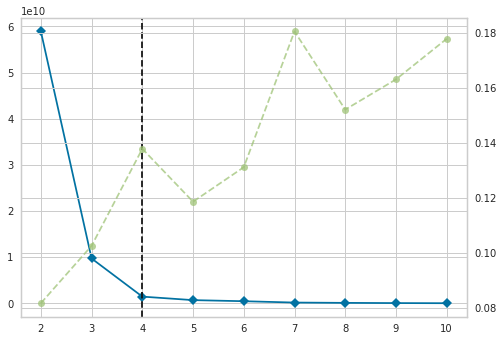

In [147]:
visualizer.fit(berlin_part_cluster)

Finally, we can try to cluster the neighborhood based on the venue categories and use K-Means clustering. These 5 clusters will be based on the similar types of restaurants in the area.

In [148]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0).fit(berlin_part_cluster)

We se the various labels

In [150]:
kmeans.labels_

array([0, 3, 3, 1, 0, 2, 4, 1, 2, 0, 1], dtype=int32)

We add the cluster labels information to our dataframe

In [151]:
b_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [154]:
b_df.head()

,Cluster Labels,Borough,Population 31 March 2010,Area in km2,Density per km2,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,Longitude
0,0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",1325.0,1100.0,52.504867,13.341420
1,3,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,1,"[(0201) Friedrichshain,(0202) Kreuzberg]","[(0201) Friedrichshain,(0202) Kreuzberg]",1200.0,1000.0,52.488265,13.491453
2,3,Lichtenberg,259881,52.29,4952,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",925.0,925.0,52.574508,13.567705
3,1,Marzahn-Hellersdorf,248264,61.74,4046,NaN,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",9,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",950.0,850.0,52.525944,13.658502
4,0,Mitte,332919,39.47,8272,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",1325.0,1050.0,52.508571,13.429401


Finally we visualize the cluster on a folium map

In [160]:
import numpy as np # library to handle data in a vectorized manner
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, borough, cluster in zip(b_df['Latitude'], b_df['Longitude'], b_df['Borough'], b_df['Cluster Labels']):
    label = folium.Popup(borough + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [159]:
b_df.loc[b_df['Cluster Labels'] == 0, b_df.columns[[1] + list(range(5, b_df.shape[1]))]]

,Borough,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,NaN,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",3,3,"[(0401) Charlottenburg,(0402) Wilmersdorf,(040...","[(0401) Charlottenburg,(0402) Wilmersdorf,(040...",1325.0,1100.0,52.504867,13.341420
4,Mitte,NaN,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",0,0,"[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...","[(0101) Mitte,(0102) Moabit,(0103) Hansavierte...",1325.0,1050.0,52.508571,13.429401
9,Tempelhof-Schöneberg,NaN,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",6,6,"[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...","[(0701) Schöneberg,(0702) Friedenau,(0703) Tem...",1175.0,975.0,52.385780,13.427455


Cluster 2

In [161]:
b_df.loc[b_df['Cluster Labels'] == 1, b_df.columns[[1] + list(range(5, b_df.shape[1]))]]

,Borough,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,Longitude
3,Marzahn-Hellersdorf,NaN,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",9,9,"[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...","[(1001) Marzahn,(1002) Biesdorf,(1003) Kaulsdo...",950.0,850.0,52.525944,13.658502
7,Spandau,NaN,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",4,4,"[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...","[(0501) Spandau,(0502) Haselhorst,(0503) Sieme...",975.0,850.0,52.534050,13.282182
10,Treptow-Köpenick,NaN,8,"[(0901) Alt-Treptow,(0902) Plänterwald,(0903) ...",8,8,"[(0901) Alt-Treptow,(0902) Plänterwald,(0903) ...","[(0901) Alt-Treptow,(0902) Plänterwald,(0903) ...",1050.0,950.0,52.437703,13.761140


Cluster 3

In [162]:
b_df.loc[b_df['Cluster Labels'] == 2, b_df.columns[[1] + list(range(5, b_df.shape[1]))]]

,Borough,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,Longitude
5,Neukölln,NaN,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",7,7,"[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...","[(0801) Neukölln,(0802) Britz,(0803) Buckow,(0...",1025.0,850.0,52.413591,13.524062
8,Steglitz-Zehlendorf,NaN,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",5,5,"[(0601) Steglitz,(0602) Lichterfelde,(0603) La...","[(0601) Steglitz,(0602) Lichterfelde,(0603) La...",1125.0,950.0,52.429116,13.371595


Cluster 4

In [163]:
b_df.loc[b_df['Cluster Labels'] == 3, b_df.columns[[1] + list(range(5, b_df.shape[1]))]]

,Borough,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,Longitude
1,Friedrichshain-Kreuzberg,NaN,1,"[(0201) Friedrichshain,(0202) Kreuzberg]",1,1,"[(0201) Friedrichshain,(0202) Kreuzberg]","[(0201) Friedrichshain,(0202) Kreuzberg]",1200.0,1000.0,52.488265,13.491453
2,Lichtenberg,NaN,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",10,10,"[(1101) Friedrichsfelde,(1102) Karlshorst,(110...","[(1101) Friedrichsfelde,(1102) Karlshorst,(110...",925.0,925.0,52.574508,13.567705


Cluster 5

In [164]:
b_df.loc[b_df['Cluster Labels'] == 4, b_df.columns[[1] + list(range(5, b_df.shape[1]))]]

,Borough,Map,No_x,Neighborhoods_x,No_y,No,Neighborhoods_y,Neighborhoods,Prefered residential area,Standard residential area,Latitude,Longitude
6,Pankow,NaN,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",2,2,"[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...","[(0301) Prenzlauer Berg,(0302) Weißensee,(0303...",1150.0,1000.0,52.645034,13.523023
